In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
import sys
sys.path.append('../utils')

In [3]:
from sdafe.ch19.tail_index import hill_curve, hill_curve2

### 19.1 The Need for Risk Management

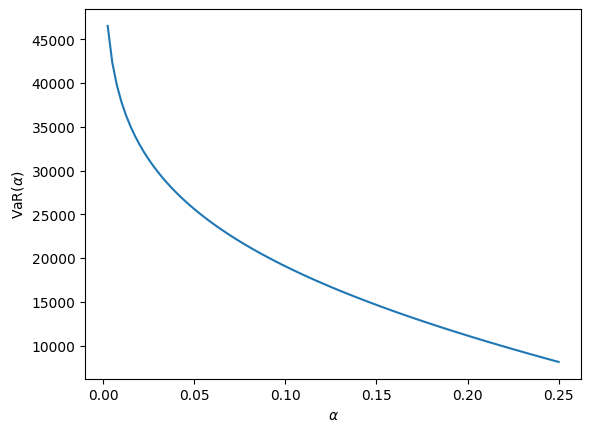

In [4]:
xs = np.linspace(0.0025, 0.25, 100)
fig, ax = plt.subplots()
ax.plot(xs, -4000 + 18000 * stats.norm.ppf(1 - xs));
ax.set_xlabel('$\\alpha$');
ax.set_ylabel('VaR($\\alpha$)');

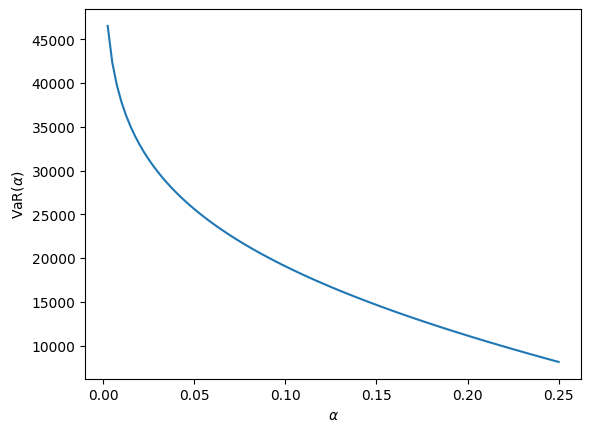

In [5]:
xs = np.linspace(0.0025, 0.25, 100)
fig, ax = plt.subplots()
ax.plot(xs, -stats.norm.ppf(xs, loc=4000, scale=18000));
ax.set_xlabel('$\\alpha$');
ax.set_ylabel('VaR($\\alpha$)');

In [6]:
-stats.norm.ppf(0.25, loc=4000, scale=18000)

8140.815503529471

In [7]:
-stats.norm.ppf(0.0025, loc=4000, scale=18000)

46526.60783018848

### 19.6.1 Estimating the Tail Index

In [8]:
data = pd.read_csv('../data/SP500.csv')
data.head()

,r500
0,-0.011727
1,0.002454
2,0.011052
3,0.019051
4,-0.005566


In [9]:
ret = data.iloc[-1000:, 0]

In [10]:
def unzip(x: np.array):
    return x[:, 0], x[:, 1]

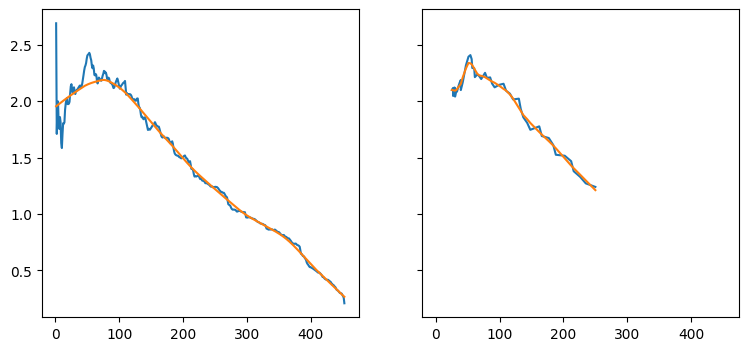

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)

c1, nc1, a1 = hill_curve(ret)
axs[0].plot(nc1, a1);
axs[0].plot(*unzip(lowess(a1, nc1, frac=0.2)))

c2, nc2, a2 = hill_curve2(ret, 0.025, 0.25, 50)
axs[1].plot(nc2, a2);
axs[1].plot(*unzip(lowess(a2, nc2, frac=0.2)));

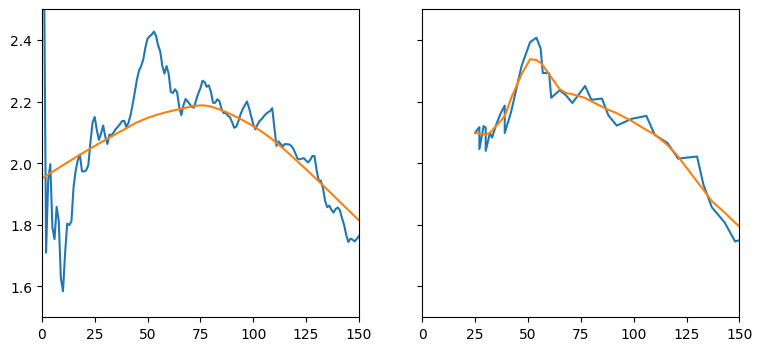

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)

c1, nc1, a1 = hill_curve(ret)
axs[0].plot(nc1, a1);
axs[0].plot(*unzip(lowess(a1, nc1, frac=0.2)))
axs[0].set_xlim((0, 150));
axs[0].set_ylim((1.5, 2.5));

c2, nc2, a2 = hill_curve2(ret, 0.025, 0.25, 50)
axs[1].plot(nc2, a2);
axs[1].plot(*unzip(lowess(a2, nc2, frac=0.2)));

We can use 2.2 as the Hill estimate.